# Project: Investigate a Dataset - Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description  

This dataset has information from over 100,000 medical appointments in Brazil. There are 14 columns total in this dataset.

**PatientID** is the ID number associated with every patient.

**AppointmentID** is the ID number associated with a specific appointment.

**Gender** is the value of M(ale) or F(emale).

**ScheduledDay** is the day someone called or registered the appointment. This value will always be before the scheduled appointment.

**AppointmentDay** is the date of the actual appointment.

**Age** is how old the patient is at the time of the appointment.

**Neighborhood** location of the appointment.

**Scholarship** is value of 1 (True) or 0 (False) of whether the patient is enrolled in the Brasilian welfare program [Bolsa Familia](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia).

**Hypertension** is value of 1 (True) or 0 (False).

**Diabetes** is value of 1 (True) or 0 (False).

**Alcoholism** is value of 1 (True) or 0 (False).

**Handicap** is value of 1 (True) or 0 (False).

**SMS_Received** is value of 1 (True) or 0 (False) of whether there was a text message sent to the patient.

**No-Show** is value of No or Yes. No is if the patient *showed up* to their appointment, Yes is if the patient *did not* show up.

### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

Does a SMS (text message) influence whether a patient is a no-show? For example, would sending a text with a reminder or confirmation increase the chances of a patient attending their appointment?


> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [43]:
import numpy as np
import pandas as pd
import matplotlib as mpl

<a id='wrangling'></a>
## Data Wrangling

In [45]:
# Loads data
df = pd.read_csv('/workspace/Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

# Print out first few lines
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The dataset was loaded in and then the first few lines were printed out to ensure it was loaded in correctly.

In [4]:
# Finds size of dataframe
rows, columns = df.shape
print(f"Number of rows: {rows}, Number of columns: {columns}")

Number of rows: 110527, Number of columns: 14


This finds the size of our dataframe and printed out the amount of rows and columns in our dataset.

In [5]:
# Inspect data types and find if there is any missing data
df.info()

# Since the non-null count is the same for all columns, there is no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


This shows the data types of each column and whether there are any non-null values. Since the non-null count is the same for all columns, this means there is no missing data.

In [6]:
# Find if there are any duplicates within our data
sum(df.duplicated())

0

This finds whether there are any duplicates within our data. Since the sum of duplicates is zero, this means there are no duplicates within our dataset.


### Data Cleaning

In [46]:
# Converting columns to the correct data types
# Changes ScheduledDay to a datetime format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

# Changes AppointmentDay to a datetime fortmat
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Check whether data type was changed correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

Converted incorrect column data types into correct ones. Changed ScheduledDay and AppointmentDay from an object data type into a datetime data type. Then, checked whether it was changed successfully.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Does a SMS (text message) influence whether a patient is a no-show?

In [8]:
# Find how many SMS messages were sent
df_sent = df.query('SMS_received == 1')
df_sent.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
11,7.542951e+12,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
15,9.994839e+10,5620206,F,2016-04-26 08:47:27+00:00,2016-04-29 00:00:00+00:00,15,NOVA PALESTINA,0,0,0,0,0,1,No
18,1.713538e+13,5621836,F,2016-04-26 10:54:18+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,1,0,0,0,0,1,No
22,8.632298e+14,5616091,M,2016-04-25 13:29:16+00:00,2016-04-29 00:00:00+00:00,13,CONQUISTA,0,0,0,0,0,1,Yes
25,5.819370e+12,5624020,M,2016-04-26 15:04:17+00:00,2016-04-29 00:00:00+00:00,46,CONQUISTA,0,1,0,0,0,1,No


In [9]:
# Find count of sent SMS messages
df_sent.shape

(35482, 14)

Queries out the data with only a value of 1 (True) for the SMS_Received column. Found that there are 35,482 **sent** messages out of 110,527.

In [10]:
# Find how many SMS messages were not sent
df_nsent = df.query('SMS_received == 0')
df_nsent.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
# Find count of not sent SMS messages
df_nsent.shape

(75045, 14)

Queries out the data with only a value of 0 (False) for the SMS_Received column. Found that there are 75,045 **not sent** messages out of 110,527.

In [29]:
# Creates a Dataframe containing count of SMS sent or not sent
df_sms = (df.groupby(['SMS_received'])['PatientId'].count().rename('Count_of_SMS')).reset_index()
print(df_sms)

   SMS_received  Count_of_SMS
0             0         75045
1             1         35482


Created a Dataframe with how many SMS were sent (1) or not sent (0)

<AxesSubplot: ylabel='Count_of_SMS'>

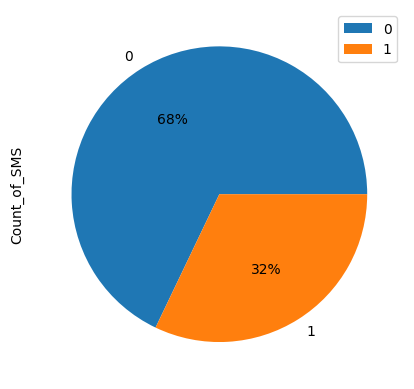

In [36]:
# Creates a visual containing above data
df_sms.groupby('SMS_received').sum().plot(kind = 'pie', y = 'Count_of_SMS', autopct = '%1.0f%%')

**Out of the 35,482 SMS sent, how many patients showed up to their appointments?**

In [12]:
# Group the columns of SMS_received and No-show and provide a count of how many showed versus messages received
df2 = (df.groupby(['SMS_received', 'No-show'])['No-show'].count().rename('Count').reset_index())
print(df2)

   SMS_received No-show  Count
0             0      No  62510
1             0     Yes  12535
2             1      No  25698
3             1     Yes   9784


The above table shows a comparison of how many patients showed up versus no-showed and whether they had received an SMS message or not. The code above also creates a new DataFrame containing this information.

In [37]:
# Calculate percentage of those who showed/did not show out of total of received SMS or did not receive
df2['TCount_percent'] = (df2['Count'] / df2.groupby('SMS_received')['Count'].transform('sum')) * 100
print(df2)

   SMS_received No-show  Count  TCount_percent
0             0      No  62510       83.296689
1             0     Yes  12535       16.703311
2             1      No  25698       72.425455
3             1     Yes   9784       27.574545


The above calculation finds the percentage of patients who did not receive a text but still showed or did not show and also the percentage of those who did receive a text but did not show up or did show up.

Out of those who **did not** receive a SMS, 83% attended their appointment while 16% did not.

Out of those who **did** receive a SMS, 72% attended their appointment while 27% did not.

<AxesSubplot: xlabel='SMS_received,No-show'>

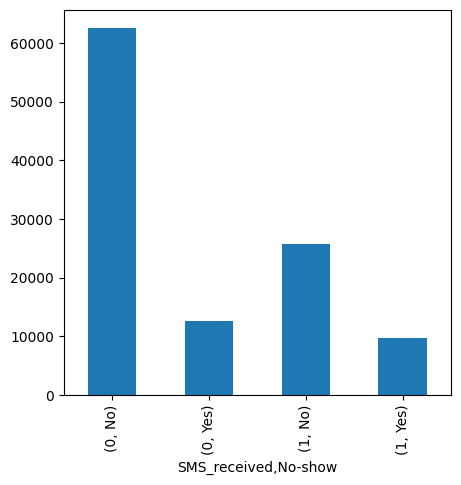

In [42]:
# Visualize the data
df.groupby(['SMS_received', 'No-show'])['No-show'].count().plot(kind= 'bar', figsize = (5, 5))

The above bar chart visualizes the groupby that was done previously. It shows the count of those who received a SMS message *(0 = did not receive, 1 = did receive)*, and whether they had shown up to that appointment *(No = patient did show up, Yes = patient did not show up)*.

<a id='conclusions'></a>
## Conclusions

This analysis uses the dataset [Medical Appointment No Shows](https://www.kaggle.com/datasets/joniarroba/noshowappointments?resource=download) and asks the question of whether receiving a SMS message regarding their appointment would affect attendance rates. 

In this analysis, I found that out of 110,527 appointments, only 35,482 messages were received. This is only about 32% of patients. In that 32%, about 72% of patients showed to their appointments. In comparison, out of the 68% that did not receive a SMS, there was a higher percentage of patients who still showed, regardless of receiving a message. There was about an 11% difference in attendence of those who did receive a text and those who did not.

Additional research or information that could be useful for answering this question could include whether patients owned a device that could receive SMS, whether they had a telephone number, if there were other ways to contact them (email, call, or mail, etc.) The data within this dataset only specifies that the SMS_received were one or more messages sent to the patient. There is no data verifying whether the SMS was actually received by the patient. This dataset could also collect information on confirmations sent to the patient. This could tie into verification of receipt by the patient.

With this little data, there is not enough information to draw a conclusion on whether sending a SMS would increase or decrease appointment attendance.


In [47]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 359863 bytes to Investigate_a_Dataset.html
